In [4]:
# sigmoid for cifar-10: adding layers

import tensorflow as tf
import tensorflow.keras as keras

# set seed
tf.random.set_seed(1234)

# data preparation
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train),(x_test, y_test) = cifar10.load_data()

# normalize
x_train, x_test = x_train / 255.0, x_test / 255.0

# model
model = keras.models.Sequential()
model.add(tf.keras.Input(shape=(32, 32, 3)))

model.add(keras.layers.Conv2D(64, (3, 3), strides=1, padding='same', activation='sigmoid'))
model.add(keras.layers.Conv2D(64, (3, 3), strides=1, padding='same', activation='sigmoid'))
model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Conv2D(128, (3, 3), strides=1, padding='same', activation='sigmoid'))
model.add(keras.layers.Conv2D(128, (3, 3), strides=1, padding='same', activation='sigmoid'))
model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Conv2D(256, (3, 3), strides=1, padding='same', activation='sigmoid'))
model.add(keras.layers.Conv2D(256, (3, 3), strides=1, padding='same', activation='sigmoid'))
model.add(keras.layers.MaxPooling2D(2))

# flatten
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation='sigmoid'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

# training
opt = tf.keras.optimizers.Adam(0.0001)
model.compile(optimizer=opt, metrics=['accuracy'], loss='sparse_categorical_crossentropy')

history = model.fit(x_train, y_train, batch_size=256, validation_data=(x_test, y_test), 
                    epochs=200, verbose=1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 128)       147584    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                  

196/196 [==============================] - 5s 24ms/step - loss: 0.8477 - accuracy: 0.7139 - val_loss: 1.1061 - val_accuracy: 0.6095
Epoch 100/200
196/196 [==============================] - 5s 24ms/step - loss: 0.8417 - accuracy: 0.7148 - val_loss: 1.1009 - val_accuracy: 0.6140
Epoch 101/200
196/196 [==============================] - 5s 24ms/step - loss: 0.8354 - accuracy: 0.7183 - val_loss: 1.0995 - val_accuracy: 0.6121
Epoch 102/200
196/196 [==============================] - 5s 24ms/step - loss: 0.8279 - accuracy: 0.7224 - val_loss: 1.0911 - val_accuracy: 0.6155
Epoch 103/200
196/196 [==============================] - 5s 24ms/step - loss: 0.8253 - accuracy: 0.7221 - val_loss: 1.1069 - val_accuracy: 0.6086
Epoch 104/200
196/196 [==============================] - 5s 24ms/step - loss: 0.8181 - accuracy: 0.7258 - val_loss: 1.0937 - val_accuracy: 0.6157
Epoch 105/200
196/196 [==============================] - 5s 24ms/step - loss: 0.8131 - accuracy: 0.7274 - val_loss: 1.0891 - val_accuracy:

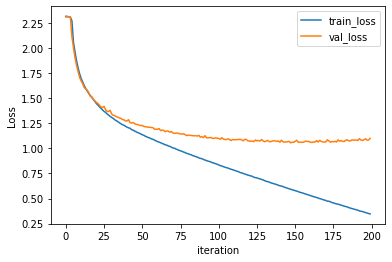

In [5]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label = "train_loss")
plt.plot(history.history['val_loss'], label = "val_loss")
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()

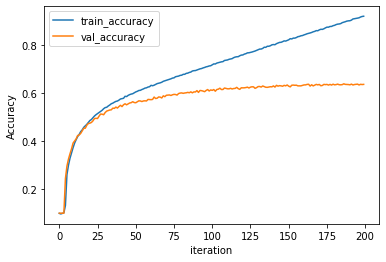

In [6]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label = "train_accuracy")
plt.plot(history.history['val_accuracy'], label = "val_accuracy")
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()